<a href="https://colab.research.google.com/github/IvanWasNotAvailable/StockPricePrediction/blob/main/StockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

In [ ]:
%pip install yfinance
import yfinance as yf

%pip install yahoofinancials
from yahoofinancials import YahooFinancials

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from datetime import datetime, timedelta

import pandas as pd

# 1. Company Information

In [3]:
#First we select one company - the ticker can be seen on yahoofinance.com
comp = 'BAS.DE'

In [4]:
#what informations can we get from yahoo finance?
ticker = yf.Ticker(comp).info
print(ticker.keys())

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'for

In [5]:
#This is a sample of data for the selected company
longName = ticker['longName']
fullTimeEmployees = ticker['fullTimeEmployees']
totalCash = ticker['totalCash']
phone = ticker['phone']
print('Company:', longName)
print('FTEs:', fullTimeEmployees)
print('TotalCash:', totalCash/1000000 , 'M')
print('Tel:', phone)

Company: BASF SE
FTEs: 111768
TotalCash: 3384.999936 M
Tel: 49 0621 60 0


# 2. Historical Data

In [6]:
yahoo_financials = YahooFinancials(comp)
data = yahoo_financials.get_historical_price_data(start_date='2021-01-03', end_date='2022-12-31', time_interval='weekly')
basf_df = pd.DataFrame(data[comp]['prices'])
basf_df = basf_df.drop(['low', 'high', 'adjclose', 'close', 'volume', 'date'], axis=1)
basf_df.head(3)

,open,formatted_date
0,65.480003,2020-12-31
1,69.000000,2021-01-07
2,67.639999,2021-01-14


In [7]:
#add increased variable, wich shows if the open price is higher then last week
basf_df['increased'] = basf_df.open >= basf_df.open.shift()
basf_df.head(3)

,open,formatted_date,increased
0,65.480003,2020-12-31,False
1,69.000000,2021-01-07,True
2,67.639999,2021-01-14,False


In [9]:
#change to binary -> True = 1 & False = 0

encoder = LabelEncoder()
basf_df['increased'] = encoder.fit_transform(basf_df['increased'])

In [10]:
basf_df.head(3)

,open,formatted_date,increased
0,65.480003,2020-12-31,0
1,69.000000,2021-01-07,1
2,67.639999,2021-01-14,0


In [ ]:
#check the date format
x = basf_df.formatted_date[1]
print(x)

2021-01-07


# 3. Charts

[*********************100%***********************]  1 of 1 completed
Week: 2020-12-31  -  2021-01-07
Increased:  1 Index: 0


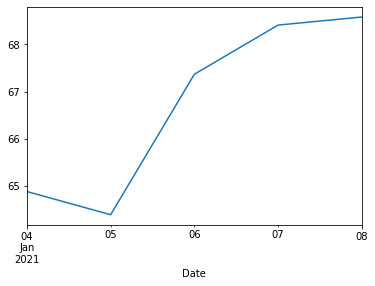

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-07  -  2021-01-14
Increased:  0 Index: 1


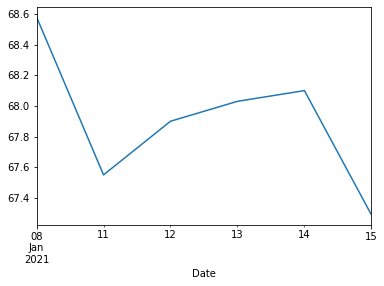

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-14  -  2021-01-21
Increased:  0 Index: 2


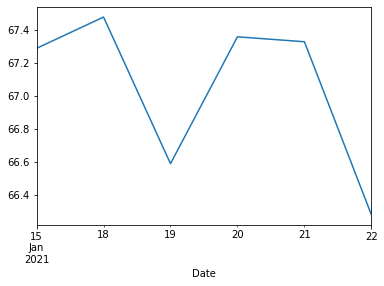

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-21  -  2021-01-28
Increased:  0 Index: 3


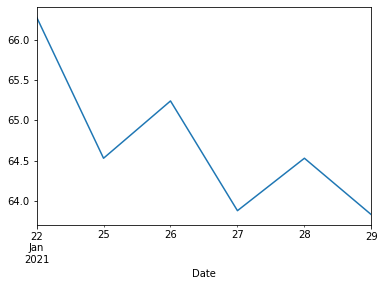

[*********************100%***********************]  1 of 1 completed
Week: 2021-01-28  -  2021-02-04
Increased:  1 Index: 4


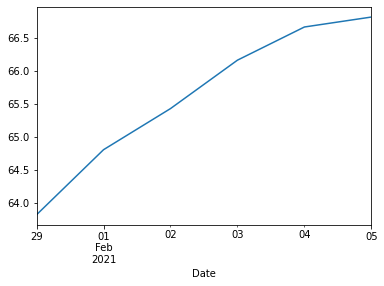

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-04  -  2021-02-11
Increased:  1 Index: 5


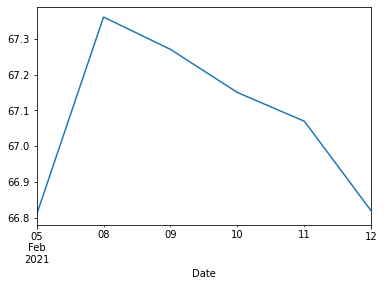

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-11  -  2021-02-18
Increased:  1 Index: 6


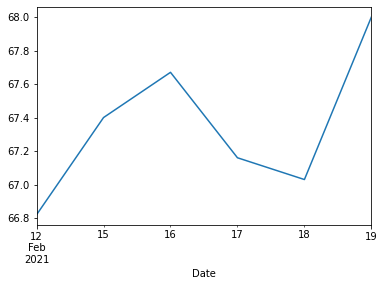

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-18  -  2021-02-25
Increased:  0 Index: 7


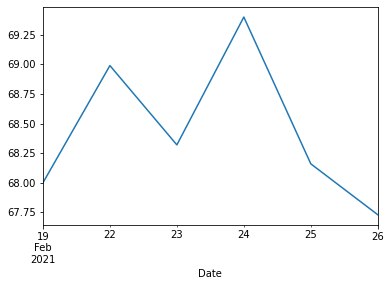

[*********************100%***********************]  1 of 1 completed
Week: 2021-02-25  -  2021-03-04
Increased:  1 Index: 8


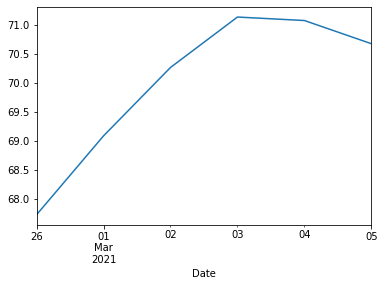

[*********************100%***********************]  1 of 1 completed
Week: 2021-03-04  -  2021-03-11
Increased:  1 Index: 9


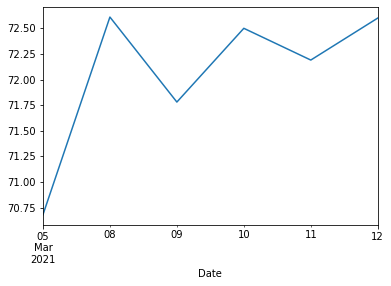

[*********************100%***********************]  1 of 1 completed
Week: 2021-03-11  -  2021-03-18
Increased:  0 Index: 10


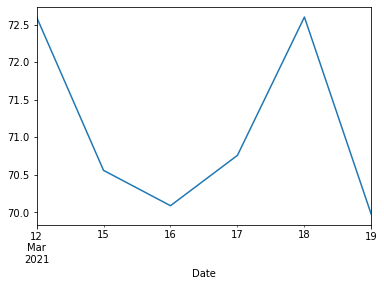

In [ ]:
#print the first 10 weekly charts 
for index, row in basf_df.iterrows():
    #set start and end of the week & get data
    start = basf_df.formatted_date[index]
    startDate = datetime.strptime(start, "%Y-%m-%d") + timedelta(days=1)
    end = basf_df.formatted_date[index+1]
    endDate = datetime.strptime(end, "%Y-%m-%d") + timedelta(days=3)

    data = yf.download(comp,startDate,endDate)
    # Plot the close chart
    print('Week:', start, ' - ',end)
    print('Increased: ', basf_df.increased[index+1], 'Index:', index)
    data['Close'].plot()
    plt.show()
    #stop after printing 10 charts
    if index == 10:
      break

#4. Preparation


In [ ]:
#we can now drop the open price
basf_df = basf_df.drop(['open'], axis=1)

In [ ]:
basf_df.head(10)

,formatted_date,increased
0,2020-12-31,0
1,2021-01-07,1
2,2021-01-14,0
3,2021-01-21,0
4,2021-01-28,0
5,2021-02-04,1
6,2021-02-11,1
7,2021-02-18,1
8,2021-02-25,0
9,2021-03-04,1
